In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


from sklearn.preprocessing import MinMaxScaler

pd.options.display.max_columns = None #생략을 없애는 것

In [214]:
label_data = pd.read_csv('../dataset/labeled_data.csv')

In [215]:
label_data.head(10)

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.59,4.47,16.92,59.520000,7.13,653.409973,0.0,68.849998,647.98999,55.400002,30.700001,292.500000,141.800003,136.800003,37.400002,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,0.0,66.300003,0.0,0.0,24.799999,27.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.500000,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,0.0,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.500000,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,0.0,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5f8928f39c0189cc666ef25e,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,31.000000,292.500000,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,0.0,0.0,25.000000,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5f8928f59c0189cc666ef265,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,31.000000,292.500000,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,0.0,0.0,25.000000,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5f89294b9c0189cc666ef5b9,2020-10-16 05:00:46,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.58,4.46,16.90,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.599998,30.900000,292.500000,141.699997,136.399994,37.700001,59.400002,276.299988,275.299988,275.200012,271.399994,255.000000,230.000000,0.0,67.500000,0.0,0.0,25.000000,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5f89294c9c0189cc666ef5d6,2020-10-16 05:00:46,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.58,4.46,16.90,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.599998,30.900000,292.500000,141.699997,136.399994,37.700001,59.400002,276.299988,275.299988,275.200012,271.399994,255.000000,230.000000,0.0,67.500000,0.0,0.0,25.000000,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5f8929989c0189cc666ef872,2020-10-16 05:01:46,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.58,4.46,16.92,59.560001,7.13,653.409973,0.0,68.849998,647.98999,55.500000,30.600000,292.399994,141.800003,136.699997,37.400002,59.299999,275.799988,275.399994,275.000000,271.299988,255.000000,230.000000,0.0,67.000000,0.0,0.0,25.000000,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5f8929999c0189cc666ef87d,2020-10-16 05:01:46,2020-10-16 오전 12:00:00,23,CN7 W/S 

In [216]:
def make_input(data, machine_name ,product_name):
    machine_ = data['EQUIP_NAME'] == machine_name
    product_ = data['PART_NAME'] == product_name
    data = data[machine_ & product_]
    
    # 불필요하다고 판단된 columns
    data.drop(['_id','TimeStamp','PART_FACT_PLAN_DATE', 'Reason',
               #'ERR_FACT_QTY',
               'PART_FACT_SERIAL','PART_NAME','EQUIP_CD', 'EQUIP_NAME',
               # mean=0인거 제거
               'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_5', 
               'Mold_Temperature_6', 'Mold_Temperature_7', 'Mold_Temperature_8', 
               'Mold_Temperature_9', 'Mold_Temperature_10', 'Mold_Temperature_11', 
               'Mold_Temperature_12', 'Barrel_Temperature_7', 'Switch_Over_Position'], 
              axis=1, inplace=True)
    return data

In [217]:
machine_name = "650톤-우진2호기"
product_name = ["CN7 W/S SIDE MLD'G LH", "CN7 W/S SIDE MLD'G RH", "RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH"]

# "650톤-우진2호기'의 "CN7 W/S SIDE MLD'G LH" 데이터만 변수를 제거하여 가져옴
cn7lh = make_input(label_data, machine_name, product_name[0])
# "650톤-우진2호기'의 "CN7 W/S SIDE MLD'G RH" 데이터만 변수를 제거하여 가져옴
cn7rh = make_input(label_data, machine_name, product_name[1])
# "650톤-우진2호기'의 “RG3 MOLD’G W/SHLD, LH” 데이터만 변수를 제거하여 가져옴
rg3lh = make_input(label_data, machine_name, product_name[2])
# "650톤-우진2호기'의 “RG3 MOLD’G W/SHLD, RH” 데이터만 변수를 제거하여 가져옴
rg3rh = make_input(label_data, machine_name, product_name[3])

# 동일한 제품의 LH와 RH는 합쳐줌
cn7 = pd.concat([cn7lh, cn7rh], ignore_index=True)
rg3 = pd.concat([rg3lh, rg3rh], ignore_index=True)

C:\Users\qhrrl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [218]:
cn7['PassOrFail'] = cn7['PassOrFail'].replace('Y', 0).replace('N', 1)

In [219]:
cn7.describe()

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000
mean,0.005790,9.580064,4.448425,16.820433,59.549314,7.113639,653.440859,68.381941,644.899046,55.523085,30.674674,125.583744,142.090559,136.518646,37.842132,59.347209,275.965024,275.134961,274.858091,270.285823,254.924346,229.971512,66.663094,22.074228,23.473619
std,0.075876,0.180526,0.140286,0.288946,0.372267,0.075843,0.115004,0.648307,42.170577,1.005340,0.141148,126.836972,1.985764,0.754736,1.768085,3.530820,2.302366,1.887356,1.854329,2.018081,1.134566,0.428762,2.433782,1.171389,1.370780
min,0.000000,9.360000,3.350000,16.469999,58.840000,6.070000,653.390015,59.759998,69.639999,38.500000,30.299999,29.200001,140.699997,128.399994,21.700001,13.300000,244.699997,249.000000,249.600006,244.399994,239.699997,224.600006,38.500000,19.100000,20.600000
25%,0.000000,9.530000,4.420000,16.629999,59.480000,7.120000,653.429993,68.320000,647.989990,55.099998,30.600000,29.200001,141.800003,136.300003,37.599998,59.400002,275.799988,275.000000,274.799988,269.700012,254.800003,229.800003,65.599998,21.200001,22.600000
50%,0.000000,9.570000,4.450000,16.820000,59.520000,7.120000,653.429993,68.360001,647.989990,55.400002,30.700001,29.200001,141.899994,136.500000,37.900002,59.500000,276.100006,275.299988,275.000000,270.399994,255.000000,230.000000,67.000000,21.900000,23.299999
75%,0.000000,9.600000,4.480000,16.910000,59.540001,7.120000,653.440002,68.510002,647.989990,55.900002,30.799999,292.399994,142.100006,136.800003,38.200001,59.700001,276.399994,275.500000,275.200012,271.100006,255.199997,230.100006,67.800003,22.799999,24.200001
max,1.000000,13.390000,8.270000,21.100000,64.349998,7.180000,655.000000,68.860001,647.989990,64.800003,31.200001,293.899994,169.100006,146.699997,75.199997,90.800003,277.899994,276.500000,276.000000,272.399994,256.299988,230.699997,70.599998,25.299999,27.799999


In [220]:
np_cn7 = cn7.to_numpy()

# Pass / Fail 분류

In [221]:
cn7_pass = []
cn7_fail = []

for i in np_cn7: 
    if i[:][0] == 0:
        cn7_fail.append(i)
    else:
        cn7_pass.append(i)

In [222]:
pd_cn7_fail = pd.DataFrame(cn7_fail)
pd_cn7_pass = pd.DataFrame(cn7_pass)

In [223]:
pd_cn7_fail

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.0,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,30.799999,292.500000,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
1,0.0,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,55.299999,31.000000,292.500000,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.600000
2,0.0,9.58,4.46,16.900000,59.580002,7.13,653.409973,68.839996,647.98999,55.599998,30.900000,292.500000,141.699997,136.399994,37.700001,59.400002,276.299988,275.299988,275.200012,271.399994,255.000000,230.000000,67.500000,25.000000,27.600000
3,0.0,9.58,4.46,16.920000,59.560001,7.13,653.409973,68.849998,647.98999,55.500000,30.600000,292.399994,141.800003,136.699997,37.400002,59.299999,275.799988,275.399994,275.000000,271.299988,255.000000,230.000000,67.000000,25.000000,27.600000
4,0.0,9.57,4.45,16.910000,59.520000,7.14,653.409973,68.830002,647.98999,55.700001,30.799999,292.500000,141.600006,136.399994,37.099998,59.099998,275.700012,274.899994,274.799988,270.799988,255.399994,230.100006,66.699997,24.799999,27.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692,0.0,9.58,4.46,16.670000,59.520000,7.11,653.429993,68.339996,647.98999,55.200001,30.600000,29.200001,142.199997,136.399994,37.900002,59.700001,275.799988,275.500000,275.500000,269.500000,255.000000,230.199997,66.000000,21.000000,22.400000
6693,0.0,9.60,4.49,16.650000,59.540001,7.11,653.429993,68.320000,647.98999,54.900002,30.799999,29.200001,142.100006,136.899994,38.099998,59.799999,276.100006,275.899994,274.899994,269.700012,254.600006,229.600006,65.400002,21.000000,22.400000
6694,0.0,9.60,4.48,16.620001,59.560001,7.11,653.429993,68.330002,647.98999,54.900002,30.700001,29.200001,142.100006,137.000000,38.299999,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,66.099998,21.000000,22.400000
6695,0.0,9.60,4.48,16.650000,59.560001,7.11,653.429993,68.349998,647.98999,55.000000,30.700001,29.200001,142.100006,136.800003,38.400002,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,66.099998,21.000000,22.400000


In [224]:
pd_cn7_fail.columns = [
    'PassOrFail','Injection_Time','Filling_Time','Plasticizing_Time','Cycle_Time',
    'Clamp_Close_Time','Cushion_Position','Plasticizing_Position','Clamp_Open_Position','Max_Injection_Speed',
    'Max_Screw_RPM','Average_Screw_RPM','Max_Injection_Pressure','Max_Switch_Over_Pressure','Max_Back_Pressure',
    'Average_Back_Pressure','Barrel_Temperature_1','Barrel_Temperature_2','Barrel_Temperature_3','Barrel_Temperature_4',\
    'Barrel_Temperature_5','Barrel_Temperature_6','Hopper_Temperature','Mold_Temperature_3','Mold_Temperature_4',
]

In [225]:
pd_cn7_pass.columns = [
    'PassOrFail','Injection_Time','Filling_Time','Plasticizing_Time','Cycle_Time',
    'Clamp_Close_Time','Cushion_Position','Plasticizing_Position','Clamp_Open_Position','Max_Injection_Speed',
    'Max_Screw_RPM','Average_Screw_RPM','Max_Injection_Pressure','Max_Switch_Over_Pressure','Max_Back_Pressure',
    'Average_Back_Pressure','Barrel_Temperature_1','Barrel_Temperature_2','Barrel_Temperature_3','Barrel_Temperature_4',\
    'Barrel_Temperature_5','Barrel_Temperature_6','Hopper_Temperature','Mold_Temperature_3','Mold_Temperature_4',
]

In [226]:
pd_cn7_fail.head(3)

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,0.0,9.60,4.48,16.91,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,30.799999,292.5,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.5,67.199997,24.799999,27.6
1,0.0,9.59,4.48,16.91,59.560001,7.13,653.419983,68.839996,647.98999,55.299999,31.000000,292.5,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.0,66.900002,25.000000,27.6
2,0.0,9.58,4.46,16.90,59.580002,7.13,653.409973,68.839996,647.98999,55.599998,30.900000,292.5,141.699997,136.399994,37.700001,59.400002,276.299988,275.299988,275.200012,271.399994,255.000000,230.0,67.500000,25.000000,27.6


## 1차적으로 독특한 평균이나, 표준편차 그리고 통계적으로 정의한 이상치를 검사

1차 대상 

[ Clamp Open Position , Average Screw RPM, Average Back Pressure, Barrel Temp1, Hopper Temp ]

In [227]:
pd_cn7_fail.describe()

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,6697.0,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000
mean,0.0,9.575707,4.443976,16.820754,59.545866,7.113505,653.440885,68.380147,644.881046,55.545916,30.674332,124.690593,142.084188,136.501807,37.811856,59.323473,275.964312,275.134627,274.856219,270.283709,254.923025,229.972063,66.668374,22.071106,23.467717
std,0.0,0.144417,0.088029,0.289453,0.359481,0.076023,0.115223,0.649670,42.292546,0.816338,0.140796,126.585460,1.983889,0.669531,1.526567,3.468641,2.308616,1.892702,1.859355,2.022469,1.137456,0.429415,2.437105,1.162081,1.355500
min,0.0,9.360000,3.350000,16.520000,58.840000,6.070000,653.409973,59.759998,69.639999,49.299999,30.299999,29.200001,140.699997,128.399994,21.700001,13.300000,244.699997,249.000000,249.600006,244.399994,239.699997,224.600006,38.500000,19.100000,20.600000
25%,0.0,9.530000,4.420000,16.629999,59.480000,7.120000,653.429993,68.320000,647.989990,55.099998,30.600000,29.200001,141.800003,136.300003,37.599998,59.400002,275.799988,275.000000,274.799988,269.700012,254.800003,229.800003,65.599998,21.200001,22.600000
50%,0.0,9.570000,4.450000,16.820000,59.520000,7.120000,653.429993,68.360001,647.989990,55.400002,30.700001,29.200001,141.899994,136.500000,37.900002,59.500000,276.100006,275.299988,275.000000,270.399994,255.000000,230.000000,67.000000,21.900000,23.299999
75%,0.0,9.600000,4.480000,16.910000,59.540001,7.120000,653.440002,68.510002,647.989990,55.900002,30.799999,292.399994,142.100006,136.800003,38.200001,59.700001,276.399994,275.500000,275.100006,271.100006,255.199997,230.100006,67.800003,22.799999,24.200001
max,0.0,11.480000,4.820000,21.100000,64.349998,7.140000,655.000000,68.860001,647.989990,64.800003,31.200001,293.899994,169.100006,138.800003,75.199997,90.800003,277.899994,276.500000,276.000000,272.399994,256.299988,230.699997,70.599998,25.299999,27.799999


In [228]:
pd_cn7_fail = pd_cn7_fail.drop(columns =['PassOrFail'])

In [229]:
pd_cn7_fail.describe()

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000
mean,9.575707,4.443976,16.820754,59.545866,7.113505,653.440885,68.380147,644.881046,55.545916,30.674332,124.690593,142.084188,136.501807,37.811856,59.323473,275.964312,275.134627,274.856219,270.283709,254.923025,229.972063,66.668374,22.071106,23.467717
std,0.144417,0.088029,0.289453,0.359481,0.076023,0.115223,0.649670,42.292546,0.816338,0.140796,126.585460,1.983889,0.669531,1.526567,3.468641,2.308616,1.892702,1.859355,2.022469,1.137456,0.429415,2.437105,1.162081,1.355500
min,9.360000,3.350000,16.520000,58.840000,6.070000,653.409973,59.759998,69.639999,49.299999,30.299999,29.200001,140.699997,128.399994,21.700001,13.300000,244.699997,249.000000,249.600006,244.399994,239.699997,224.600006,38.500000,19.100000,20.600000
25%,9.530000,4.420000,16.629999,59.480000,7.120000,653.429993,68.320000,647.989990,55.099998,30.600000,29.200001,141.800003,136.300003,37.599998,59.400002,275.799988,275.000000,274.799988,269.700012,254.800003,229.800003,65.599998,21.200001,22.600000
50%,9.570000,4.450000,16.820000,59.520000,7.120000,653.429993,68.360001,647.989990,55.400002,30.700001,29.200001,141.899994,136.500000,37.900002,59.500000,276.100006,275.299988,275.000000,270.399994,255.000000,230.000000,67.000000,21.900000,23.299999
75%,9.600000,4.480000,16.910000,59.540001,7.120000,653.440002,68.510002,647.989990,55.900002,30.799999,292.399994,142.100006,136.800003,38.200001,59.700001,276.399994,275.500000,275.100006,271.100006,255.199997,230.100006,67.800003,22.799999,24.200001
max,11.480000,4.820000,21.100000,64.349998,7.140000,655.000000,68.860001,647.989990,64.800003,31.200001,293.899994,169.100006,138.800003,75.199997,90.800003,277.899994,276.500000,276.000000,272.399994,256.299988,230.699997,70.599998,25.299999,27.799999


In [106]:
pd_cn7_pass.describe()

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,39.0,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.00000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,1.0,10.328205,5.212308,16.765385,60.141539,7.136667,653.436406,68.689998,647.98999,51.602564,30.733333,278.953844,143.184613,139.410255,43.041025,63.423077,276.087179,275.192305,275.179489,270.648717,255.151280,229.876925,65.756411,22.610257,24.487180
std,0.0,1.234173,1.232971,0.175677,1.195354,0.023208,0.068347,0.146592,0.00000,6.770504,0.185434,58.825700,2.030365,3.652020,10.748066,8.505090,0.589011,0.302953,0.365044,0.959134,0.333143,0.284201,1.542178,2.222350,2.865051
min,1.0,9.440000,4.330000,16.469999,58.959999,7.110000,653.390015,68.360001,647.98999,38.500000,30.500000,29.200001,141.399994,136.100006,36.299999,58.700001,275.200012,274.700012,274.299988,268.899994,254.100006,229.399994,63.799999,20.400000,21.700001
25%,1.0,9.575000,4.460000,16.615000,59.520000,7.120000,653.404999,68.589996,647.98999,45.400002,30.600000,292.399994,141.699997,136.800003,37.200001,59.150000,275.799988,275.000000,274.899994,270.000000,255.050003,229.699997,64.400002,20.600000,21.799999
50%,1.0,9.700000,4.580000,16.820000,59.560001,7.130000,653.409973,68.610001,647.98999,53.299999,30.700001,292.500000,142.199997,137.399994,38.099998,59.700001,276.000000,275.200012,275.100006,270.899994,255.199997,229.800003,65.000000,20.700001,22.000000
75%,1.0,10.830000,5.720000,16.920000,60.459999,7.135000,653.429993,68.839996,647.98999,55.500000,30.849999,292.500000,144.899994,142.699997,43.700001,62.900002,276.650009,275.299988,275.449997,271.449997,255.349998,230.100006,67.099998,25.100000,27.700001
max,1.0,13.390000,8.270000,16.959999,62.360001,7.180000,653.630005,68.860001,647.98999,60.900002,31.100000,292.500000,147.399994,146.699997,71.900002,87.099998,277.299988,276.299988,275.700012,272.100006,255.699997,230.399994,68.500000,25.200001,27.700001


In [117]:
pd_cn7_pass = pd_cn7_pass.drop(columns =['PassOrFail'])

In [123]:
pd_cn7_pass

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,9.58,4.47,16.889999,59.520000,7.13,653.409973,68.839996,647.98999,55.400002,30.600000,292.500000,141.800003,136.600006,37.599998,59.400002,276.100006,275.200012,275.100006,271.399994,255.199997,230.199997,67.800003,25.000000,27.500000
1,9.45,4.33,16.959999,59.580002,7.13,653.400024,68.839996,647.98999,60.700001,30.799999,292.500000,141.399994,136.800003,37.099998,59.099998,275.299988,275.299988,275.100006,269.799988,255.000000,230.100006,68.000000,25.000000,27.700001
2,9.45,4.33,16.930000,59.419998,7.13,653.400024,68.839996,647.98999,60.900002,30.900000,292.500000,141.399994,136.899994,36.299999,58.700001,276.700012,274.899994,274.899994,270.399994,254.899994,229.800003,67.000000,25.100000,27.700001
3,9.44,4.33,16.920000,59.439999,7.13,653.400024,68.860001,647.98999,60.799999,30.700001,292.500000,141.399994,137.000000,36.500000,58.799999,276.000000,275.200012,274.799988,271.100006,254.699997,229.800003,67.000000,25.100000,27.600000
4,13.39,8.27,16.650000,59.560001,7.12,653.630005,68.589996,647.98999,38.500000,30.799999,292.399994,147.399994,146.699997,38.099998,59.700001,275.799988,275.299988,275.299988,270.000000,255.699997,229.699997,64.400002,20.400000,21.700001
5,10.83,5.72,16.820000,62.360001,7.18,653.390015,68.580002,647.98999,45.400002,31.100000,292.399994,144.899994,142.699997,71.900002,87.099998,276.000000,274.799988,275.700012,268.899994,255.199997,229.800003,63.799999,20.600000,21.799999
6,11.49,6.37,16.750000,62.360001,7.18,653.429993,68.589996,647.98999,45.099998,30.500000,292.500000,145.699997,144.199997,43.700001,62.900002,275.200012,275.500000,274.899994,272.100006,255.199997,230.100006,64.300003,20.500000,21.799999
7,9.98,4.87,16.530001,60.459999,7.12,653.409973,68.610001,647.98999,49.400002,30.700001,292.500000,142.899994,139.000000,50.599998,67.400002,276.000000,275.299988,275.100006,271.600006,255.199997,229.600006,65.000000,20.700001,22.000000
8,9.70,4.58,16.469999,58.959999,7.12,653.450012,68.589996,647.98999,53.299999,30.500000,292.299988,142.199997,137.399994,38.599998,60.200001,276.799988,275.100006,275.700012,270.899994,255.399994,229.399994,64.500000,20.600000,21.900000
9,9.60,4.48,16.580000,59.520000,7.11,653.429993,68.360001,647.98999,55.000000,30.600000,29.200001,142.100006,136.800003,38.299999,59.900002,277.299988,275.200012,274.899994,271.500000,255.100006,230.100006,65.300003,22.200001,24.000000


정상 : 6697 비정상 : 39 

0.58 % 

# 시각화 (정상 / 비정상 순)

In [124]:
labels = [
    'Injection_Time','Filling_Time','Plasticizing_Time','Cycle_Time',
    'Clamp_Close_Time','Cushion_Position','Plasticizing_Position','Clamp_Open_Position','Max_Injection_Speed',
    'Max_Screw_RPM','Average_Screw_RPM','Max_Injection_Pressure','Max_Switch_Over_Pressure','Max_Back_Pressure',
    'Average_Back_Pressure','Barrel_Temperature_1','Barrel_Temperature_2','Barrel_Temperature_3','Barrel_Temperature_4',\
    'Barrel_Temperature_5','Barrel_Temperature_6','Hopper_Temperature','Mold_Temperature_3','Mold_Temperature_4',
]

In [188]:
def make_plot(data): 
    #fig = plt.figure(figsize=(15, 10))
    
    fig, ax = plt.subplots(6, 4, figsize=(16, 24))
    k = 0
    for i in range(6): # 24개 칼럼이니까 4개씩 6개
        for j in range(4):
            ax[i, j].plot(data[labels[k]])
            ax[i, j].set_title(labels[k])
            #fig.add_subplot(i,j)
            k += 1
    plt.show()

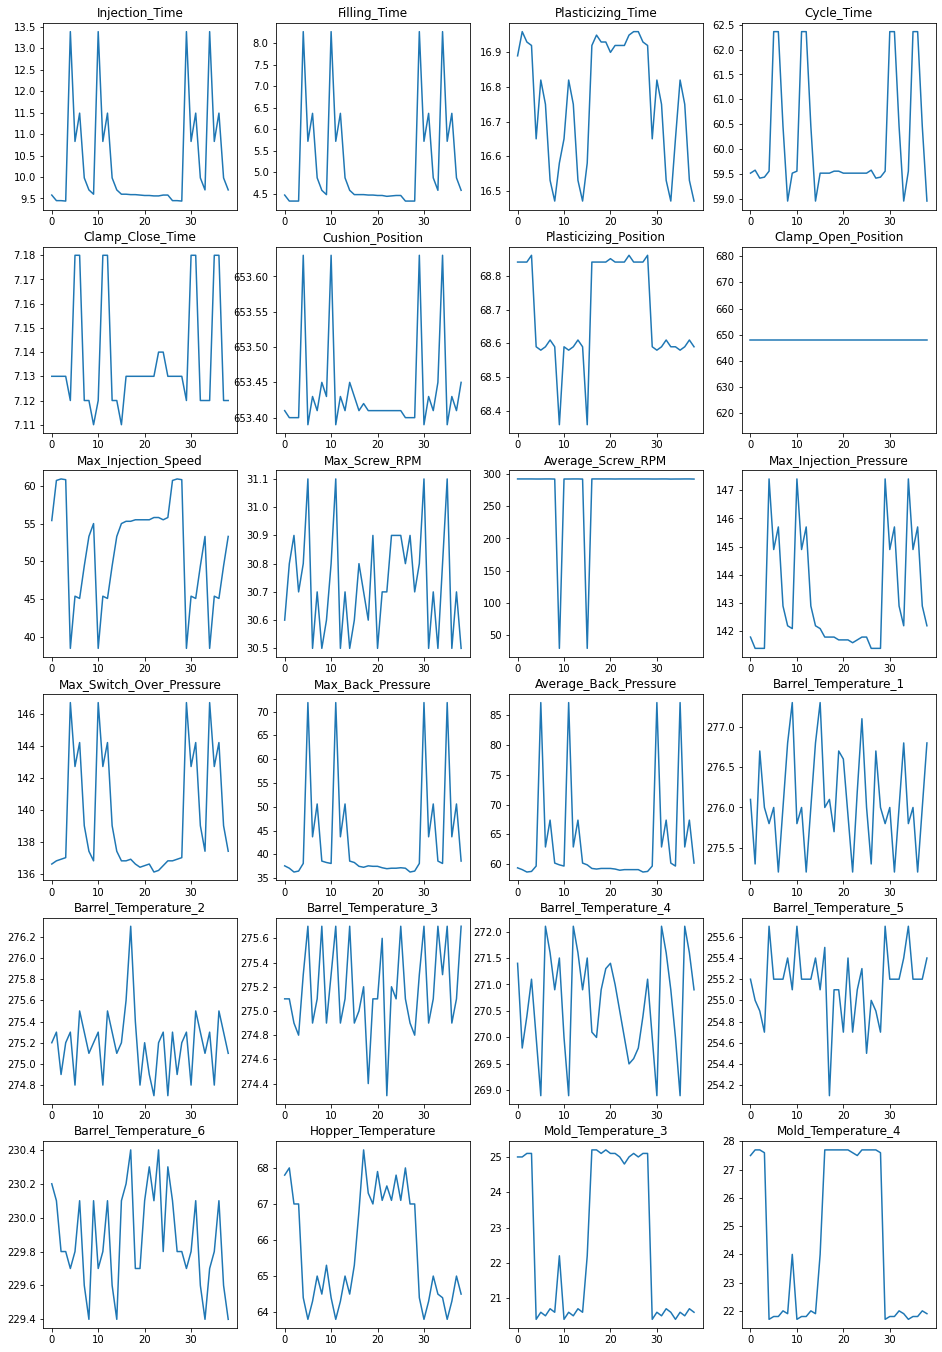

In [189]:
make_plot(pd_cn7_pass)

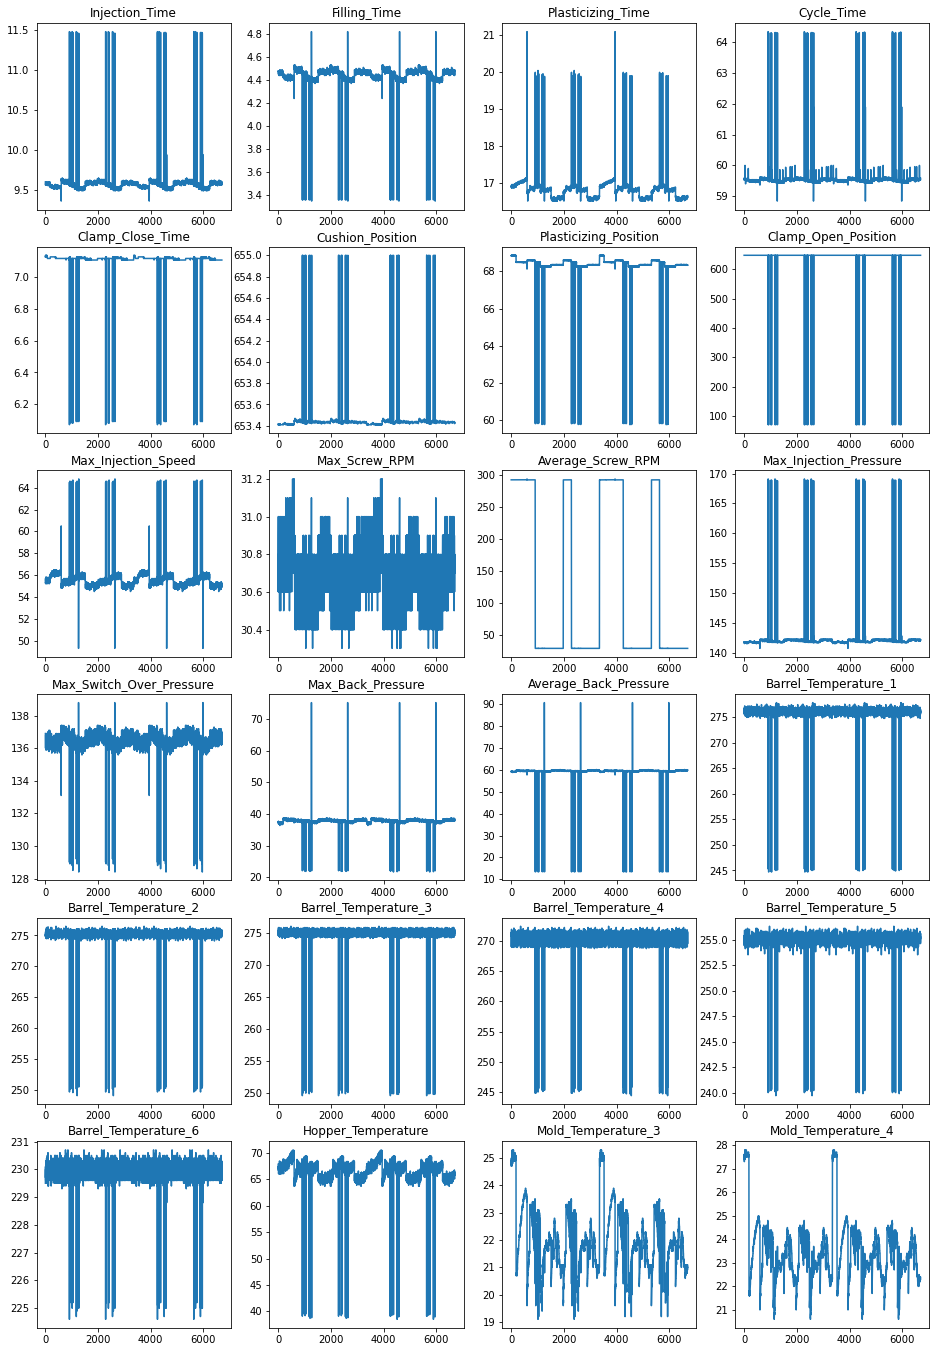

In [190]:
make_plot(pd_cn7_fail)

In [209]:
def draw_box(data):
    fig, ax = plt.subplots(6, 4, figsize=(16, 24))
    k = 0
    for i in range(6): # 24개 칼럼이니까 4개씩 6개
        for j in range(4):
            ax[i, j].boxplot(data[labels[k]])
            ax[i, j].set_title(labels[k])
            k += 1
    plt.savefig("box_plot.jpg")
    plt.show()

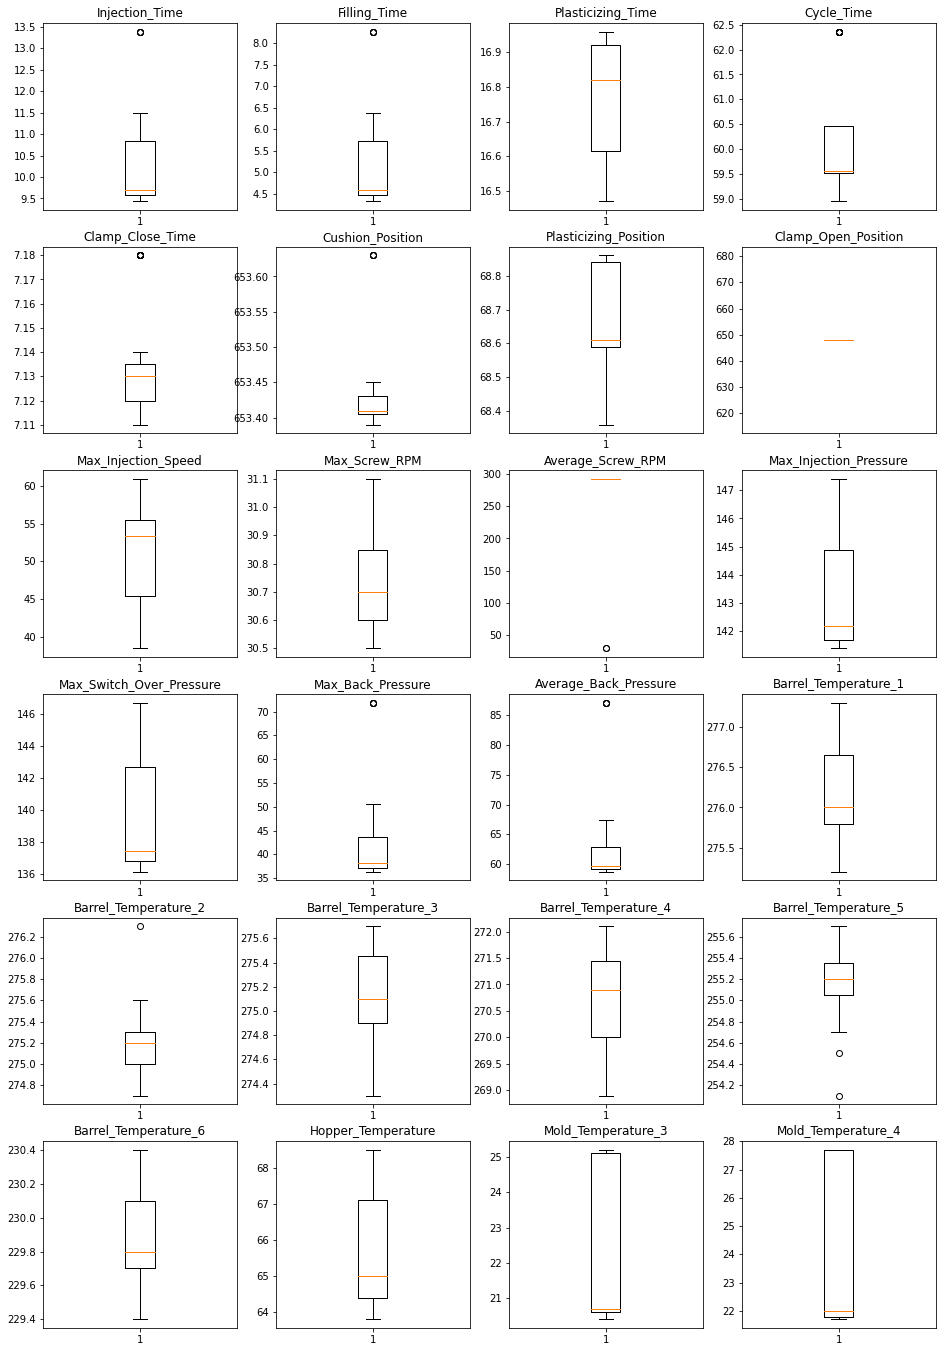

In [210]:
draw_box(pd_cn7_pass)

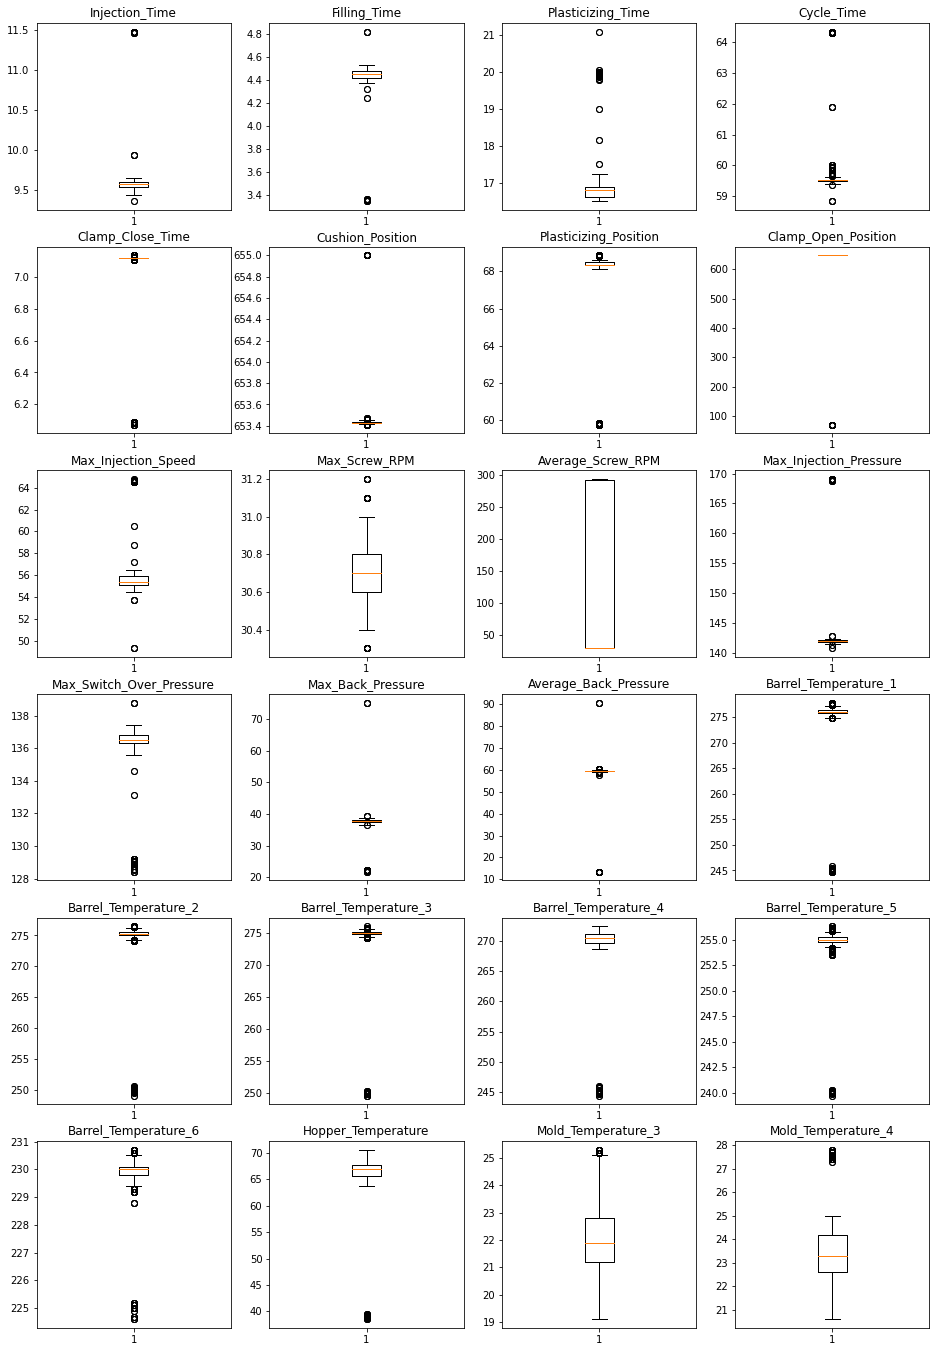

In [211]:
draw_box(pd_cn7_fail)

In [ ]:
print(cn7['Clamp_Open_Position'].describe())

cn7['Clamp_Open_Position'].plot(title = 'Clamp_Open_Position')

count    6736.000000
mean      644.899046
std        42.170577
min        69.639999
25%       647.989990
50%       647.989990
75%       647.989990
max       647.989990
Name: Clamp_Open_Position, dtype: float64


<AxesSubplot:title={'center':'Clamp_Open_Position'}>

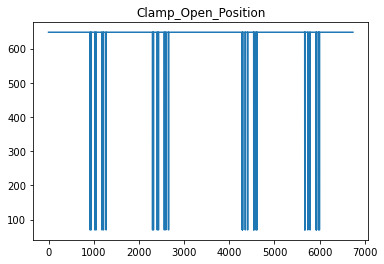

In [17]:
print(cn7['Clamp_Open_Position'].describe())

cn7['Clamp_Open_Position'].plot(title = 'Clamp_Open_Position')

count    6736.000000
mean      125.583744
std       126.836972
min        29.200001
25%        29.200001
50%        29.200001
75%       292.399994
max       293.899994
Name: Average_Screw_RPM, dtype: float64


<AxesSubplot:title={'center':'Average_Screw_RPM'}>

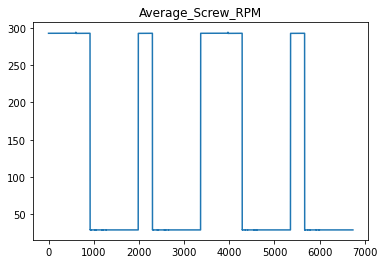

In [15]:
print(cn7['Average_Screw_RPM'].describe())

cn7['Average_Screw_RPM'].plot(title = 'Average_Screw_RPM')

count    6736.000000
mean       59.347209
std         3.530820
min        13.300000
25%        59.400002
50%        59.500000
75%        59.700001
max        90.800003
Name: Average_Back_Pressure, dtype: float64


<AxesSubplot:title={'center':'Average_Back_Pressure'}>

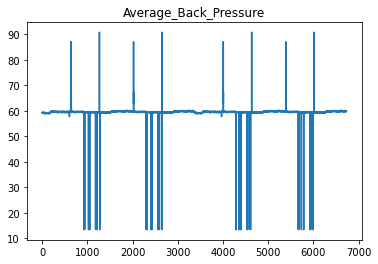

In [14]:
print(cn7['Average_Back_Pressure'].describe())

cn7['Average_Back_Pressure'].plot(title = 'Average_Back_Pressure')

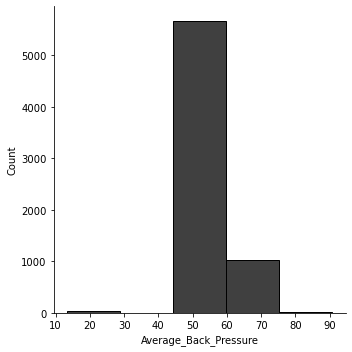

In [32]:
sns.displot(cn7['Average_Back_Pressure'], bins = 5, color = 'black')

count    6736.000000
mean      275.965024
std         2.302366
min       244.699997
25%       275.799988
50%       276.100006
75%       276.399994
max       277.899994
Name: Barrel_Temperature_1, dtype: float64


<AxesSubplot:title={'center':'Barrel_Temperature_1'}>

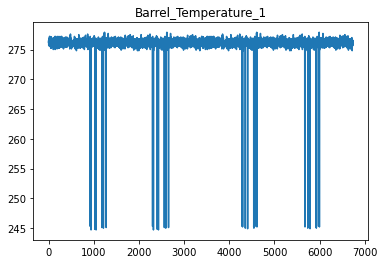

In [13]:
print(cn7['Barrel_Temperature_1'].describe())

cn7['Barrel_Temperature_1'].plot(title = 'Barrel_Temperature_1')

count    6736.000000
mean       66.663094
std         2.433782
min        38.500000
25%        65.599998
50%        67.000000
75%        67.800003
max        70.599998
Name: Hopper_Temperature, dtype: float64


<AxesSubplot:title={'center':'Hopper_Temperature'}>

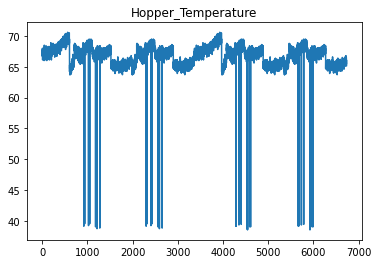

In [40]:
print(cn7['Hopper_Temperature'].describe())

cn7['Hopper_Temperature'].plot(title = 'Hopper_Temperature')

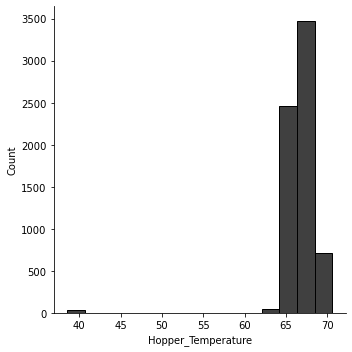

In [47]:
sns.displot(cn7['Hopper_Temperature'], bins = 15, color = 'black')